# NC, CC DIS data for global fits

In [1]:
import sys,os
import numpy as np
import pylab as py
import pandas as pd

## Notation:

- stat_u:  uncorrlated statistical uncertainty 
- syst_u:  point-by-point uncorrelated systematic uncertainty
- syst_c:  point-by-point correlated systematic uncertainty
- norm_u:  correlated normalization uncertainty

## the available data sets

In [3]:
ls src

ep_NC_optimistic.dat
ep_NC_pessimistic.dat
nuclear_NC_optimistic-barack-102420.out
nuclear_NC_pessimistic-barack-102420.out
output_CC_18x275.true-xiaoxuan-100920.dat
xQ2binTable-xiaoxuan-060220.dat


## 1) $e^-$ P NC   L=100 fb^-1

Select between optimistic and pessimistic

In [33]:
L=open('src/ep_NC_optimistic.dat').readlines()
#L=open('src/ep_NC_pessimistic.dat').readlines()

,rs,x,Q2,stat_u(%),syst_u(%),norm_c(%)
0,140.712473,0.000129,1.29,0.002154,1.5,2.5
1,140.712473,0.000205,1.29,0.002071,1.5,2.5
2,140.712473,0.000205,2.05,0.002656,1.5,2.5
3,140.712473,0.000325,1.29,0.002046,1.5,2.5
4,140.712473,0.000325,2.05,0.002565,1.5,2.5
...,...,...,...,...,...,...
493,28.635642,0.815000,51.50,0.098979,1.5,2.5
494,28.635642,0.815000,81.50,0.134081,1.5,2.5
495,28.635642,0.815000,129.00,0.179617,1.5,2.5
496,28.635642,0.815000,205.00,0.249187,1.5,2.5


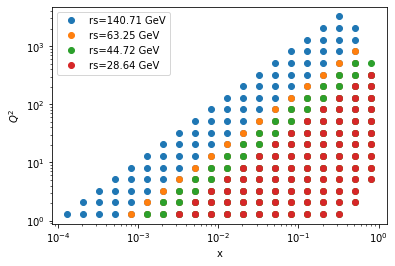

In [35]:
L=[_.strip() for _  in L]
L=[_ for _ in L if '-----' not in _  if _!='']
H=L[0].split()
I=[i for i in range(len(L)) if L[i].startswith('beam')]
I.append(len(L))

DATA={}
for i in range(len(I)-1):
    msg=L[I[i]]
    tab=[[float(v) for v in _.split()] for _ in L[I[i]+1:I[i+1]]]
    tab=np.transpose(tab)
    data={}
    El,Ep=[float(v) for v in msg.split(':')[1].split('x')]
    data['rs']=np.sqrt(4*El*Ep)
    data['x']=tab[0]
    data['Q2']=tab[1]
    data['stat_u(%)']=tab[4]/np.sqrt(10)
    data['syst_u(%)']=tab[5]
    data['norm_c(%)']=tab[6]
    DATA[msg]=pd.DataFrame(data).query('Q2>1')
data=pd.concat([DATA[msg] for msg in DATA.keys()], ignore_index=True)

ax=py.subplot(111)
for rs in data['rs'].unique():
    d=data[data['rs']==rs]
    ax.plot(d.x,d.Q2,ls='',marker='o',label='rs=%0.2f GeV'%rs)  
ax.semilogy()
ax.semilogx()
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('$Q^2$');


#--store data
#fname='NC-optimistic'
#data.to_excel(fname+'.xlsx')
#data.to_json(fname+'.json')

#--print
data

## 2) $e^-$ P CC   L=100 fb^-1
Select between optimistic and pessimistic

In [48]:
syst,norm=2,2.3 #--optimistic
#syst,norm=2,5.8 #--pessimistic 

,rs,x,Q2,stat_u(%),syst_u(%),norm_c(%)
0,140.71247,0.006783,110.0,1.490713,2.0,5.8
1,140.71247,0.009582,110.0,1.355816,2.0,5.8
2,140.71247,0.013535,110.0,1.385422,2.0,5.8
3,140.71247,0.019118,110.0,1.352094,2.0,5.8
4,140.71247,0.027005,110.0,1.363352,2.0,5.8
...,...,...,...,...,...,...
84,140.71247,0.604567,5000.0,2.644428,2.0,5.8
85,140.71247,0.853973,5000.0,15.811388,2.0,5.8
86,140.71247,0.428000,9000.0,2.581987,2.0,5.8
87,140.71247,0.604567,9000.0,1.615850,2.0,5.8


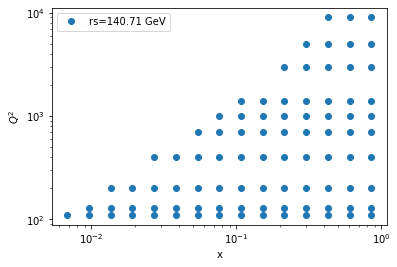

In [50]:
L=open('src/output_CC_18x275.true-xiaoxuan-100920.dat').readlines()
L=[_.strip() for _  in L]
L=[_ for _ in L if _!='']
H=L[5].split()
tab=np.transpose([[float(v) for v in  _.split()] for _ in L[6:]])
data={}
data['rs']=np.ones(tab[0].size)*float(L[1].split(',')[1].split('=')[1])
data['x']=tab[1]
data['Q2']=tab[0]
data['stat_u(%)']=tab[3]/tab[2]*100/np.sqrt(10)
data['syst_u(%)']=syst*np.ones(tab[1].size)
data['norm_c(%)']=norm*np.ones(tab[1].size)
data=pd.DataFrame(data)

ax=py.subplot(111)
for rs in data['rs'].unique():
    d=data[data['rs']==rs]
    ax.plot(d.x,d.Q2,ls='',marker='o',label='rs=%0.2f GeV'%rs)  
ax.semilogy()
ax.semilogx()
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('$Q^2$');


#--save file
#fname='CC-pessimistic'
#data.to_excel(fname+'.xlsx')

#--print
data

## 3) $e^+$ P CC   L=10 fb^-1

Select between optimistic and pessimistic

In [51]:
syst,norm=2,2.3 #--optimistic
#syst,norm=2,5.8 #--pessimistic 

,rs,x,Q2,stat_u(%),syst_u(%),norm_c(%)
0,140.71247,0.006783,110.0,4.714048,2.0,2.3
1,140.71247,0.009582,110.0,4.287466,2.0,2.3
2,140.71247,0.013535,110.0,4.381089,2.0,2.3
3,140.71247,0.019118,110.0,4.275698,2.0,2.3
4,140.71247,0.027005,110.0,4.311297,2.0,2.3
...,...,...,...,...,...,...
84,140.71247,0.604567,5000.0,8.362414,2.0,2.3
85,140.71247,0.853973,5000.0,50.000000,2.0,2.3
86,140.71247,0.428000,9000.0,8.164961,2.0,2.3
87,140.71247,0.604567,9000.0,5.109766,2.0,2.3


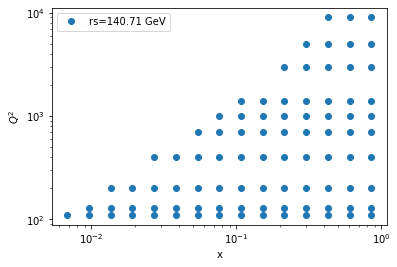

In [52]:
L=open('src/output_CC_18x275.true-xiaoxuan-100920.dat').readlines()
L=[_.strip() for _  in L]
L=[_ for _ in L if _!='']
H=L[5].split()
tab=np.transpose([[float(v) for v in  _.split()] for _ in L[6:]])
data={}
data['rs']=np.ones(tab[0].size)*float(L[1].split(',')[1].split('=')[1])
data['x']=tab[1]
data['Q2']=tab[0]
data['stat_u(%)']=tab[3]/tab[2]*100
data['syst_u(%)']=syst*np.ones(tab[1].size)
data['norm_c(%)']=norm*np.ones(tab[1].size)
data=pd.DataFrame(data)

ax=py.subplot(111)
for rs in data['rs'].unique():
    d=data[data['rs']==rs]
    ax.plot(d.x,d.Q2,ls='',marker='o',label='rs=%0.2f GeV'%rs)  
ax.semilogy()
ax.semilogx()
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('$Q^2$');


#--save file
#fname='CC-pessimistic'
#data.to_excel(fname+'.xlsx')

#--print
data

##  4) $e^-$ A  NC L=10 fb-1.  A=Light and Heavy  

A=$d$, $^3He$, $^4He$, $C$, $^{40}Ca$, $Cu$, $Au$


Select between optimistic and pessimistic

In [42]:
L=open('src/nuclear_NC_optimistic.out').readlines()
#L=open('src/nuclear_NC_pessimistic.out').readlines()

,rs,x,Q2,stat_u(%),syst_u(%),norm_c(%)
0,88.994382,0.000325,1.29,0.00744,1.5,2.5
1,88.994382,0.000515,1.29,0.00715,1.5,2.5
2,88.994382,0.000515,2.05,0.00926,1.5,2.5
3,88.994382,0.000815,1.29,0.00705,1.5,2.5
4,88.994382,0.000815,2.05,0.00892,1.5,2.5
...,...,...,...,...,...,...
275,28.635642,0.815000,20.50,0.17600,1.5,2.5
276,28.635642,0.815000,32.50,0.23800,1.5,2.5
277,28.635642,0.815000,51.50,0.29900,1.5,2.5
278,28.635642,0.815000,81.50,0.42700,1.5,2.5


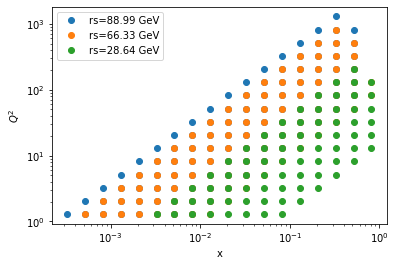

In [44]:
L=[_.strip() for _  in L]
L=[_ for _ in L if '-----' not in _  if _!='']
H=L[0].split()
I=[i for i in range(len(L)) if L[i].startswith('beam')]
I.append(len(L))

DATA={}
for i in range(len(I)-1):
    msg=L[I[i]]
    tab=[[float(v) for v in _.split()] for _ in L[I[i]+1:I[i+1]]]
    tab=np.transpose(tab)
    data={}
    El,Ep=[float(v) for v in msg.split(':')[1].split('x')]
    data['rs']=np.sqrt(4*El*Ep)
    data['x']=tab[0]
    data['Q2']=tab[1]
    data['stat_u(%)']=tab[4]
    data['syst_u(%)']=tab[5]
    data['norm_c(%)']=tab[6]
    DATA[msg]=pd.DataFrame(data).query('Q2>1')
data=pd.concat([DATA[msg] for msg in DATA.keys()], ignore_index=True)

ax=py.subplot(111)
for rs in data['rs'].unique():
    d=data[data['rs']==rs]
    ax.plot(d.x,d.Q2,ls='',marker='o',label='rs=%0.2f GeV'%rs)  
ax.semilogy()
ax.semilogx()
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('$Q^2$');


#--store data
#fname='NC-optimistic'
#data.to_excel(fname+'.xlsx')
#data.to_json(fname+'.json')

#--print
data